When light with wavelength $\lambda$ passes through the lens on a telescope (with unit radius) it diffractions and creates a circular diffraction pattern. The intensity is given by 
$$I(r) = (\frac{J_1(kr)}{kr})^2$$
where $r$ is the distance in the focal plane from the center, $k = 2\pi/\lambda$, and $J_1(x)$ is the Bessel function given by 
$$J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta-x\sin\theta)d\theta$$
where $m$ is a non-negative integer and $x \geq 0$.

In [2]:
import math
import pylab
import numpy as np

wavelength = 500e-9

In [3]:
def simpsonsrule(f, a, b, N=1000):
    h = (b - a) / N
    return 1/3 * h * (f(a) + f(b) + 4 * sum([f(a + (2*k - 1) * h) for k in range(1, int(N/2) + 1)]) + 2 * sum([f(a + 2 * k * h) for k in range(1, int(N/2))]))

In [4]:
def J(m, x):
    return 1/math.pi * simpsonsrule(lambda theta: math.cos(m * theta - x * math.sin(theta)), 0, math.pi)

In [5]:
def I(r):
    k = 2 * math.pi / wavelength
    return (J(1, k * r) / (k * r)) ** 2

In [6]:
def y(m, x):
    return [J(m, x_point) for x_point in x]

In [7]:
x = np.linspace(0, 20, 100)
y1 = y(1, x)
y2 = y(2, x)
y3 = y(3, x)

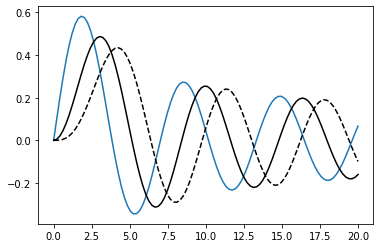

In [8]:
pylab.plot(x, y1)
pylab.plot(x, y2, 'k-')
pylab.plot(x, y3, 'k--')
pylab.show()

In [9]:
start = -1e-6
side = 2e-6
points = 200
spacing = side / points

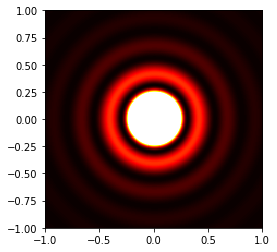

In [10]:
z = np.empty([points, points], float)

for i in range(points):
    y = spacing * i + start
    for j in range(points):
        x = spacing * j + start
        r = (x ** 2 + y ** 2) ** 0.5
        z[i, j] = I(r) if r != 0 else 0.01

pylab.imshow(z, origin='lower', extent=[-side / 2e-6, side / 2e-6, -side / 2e-6, side / 2e-6], vmax=0.01)
pylab.hot()
pylab.show()